In [1]:
import keras, os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf


In [2]:
print(tf.__version__,keras.__version__)

2.9.2 2.9.0


In [3]:
!pwd

/content


In [4]:
%cd /content/drive/MyDrive/Collab-NoteBooks/

[Errno 2] No such file or directory: '/content/drive/MyDrive/Collab-NoteBooks/'
/content


In [5]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory='dataset/training/',target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory = 'dataset/testing',target_size = (224,224))

FileNotFoundError: ignored

In [ ]:
VGG = tf.keras.applications.VGG16(input_shape=(224,224,3),include_top=True, weights="imagenet", )
VGG.trainable = False

In [ ]:
model = Sequential([VGG, tf.keras.layers.Flatten(),tf.keras.layers.Dense(units=256, activation='relu'),tf.keras.layers.Dense(units=256, activation='relu'),tf.keras.layers.Dense(units=2, activation='softmax')])

In [ ]:
model.compile(optimizer='adam', loss = tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1000)              138357544 
_________________________________________________________________
flatten_1 (Flatten)          (None, 1000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               256256    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 514       
Total params: 138,680,106
Trainable params: 322,562
Non-trainable params: 138,357,544
_________________________________________________________________


In [ ]:
hist = model.fit_generator(steps_per_epoch=100,generator=traindata,validation_data=testdata,validation_steps=10,epochs=5)
model.save('vgg16.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
100/100 [==============================] - 4s 25ms/step - loss: 0.6756 - accuracy: 0.6050 - val_loss: 0.6452 - val_accuracy: 0.7667


In [ ]:
!ls

cat.4973.jpg  dataset  dataset.zip  dog.4815.jpg  Untitled0.ipynb  vgg16.h5


In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
%cd /content/drive/MyDrive/Collab-NoteBooks/
model =  keras.models.load_model('vgg19.h5')


cat


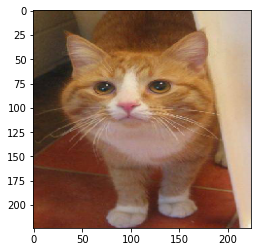

In [ ]:
from keras.preprocessing import image
img = image.load_img('cat.4973.jpg',target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img,axis=0)

res = model.predict(img)
if res[0][0] > res[0][1]:
  print('cat')
else:
  print("dog")

dog


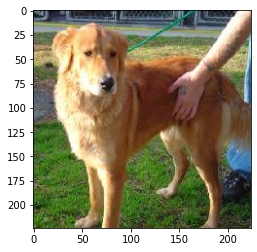

In [ ]:
from keras.preprocessing import image
img = image.load_img('dog.4815.jpg',target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img,axis=0)

res = model.predict(img)
if res[0][0] > res[0][1]:
  print('cat')
else:
  print("dog")

In [ ]:
# -*- coding: utf-8 -*-
"""Untitled2.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1UmCIXEAUhQ15uzAE_1vjTM7hLXvbfHIh
"""

from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

model = VGG16()
img_path = 'y.jpg'
img = image.load_img(img_path, target_size=(224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)

print(decode_predictions(preds,top=3))
